In [1]:
# ============================================================================
# PRAKTIKUM 5: ANALISIS STATISTIK DESKRIPTIF DENGAN PYSPARK
# Dataset: Diamonds (Harga & Karakteristik Berlian)
# ============================================================================

# ----------------------------------------------------------------------------
# 1. PERSIAPAN LINGKUNGAN (Setup PySpark)
# ----------------------------------------------------------------------------
print("=" * 70)
print("LANGKAH 1: INSTALASI DAN SETUP PYSPARK")
print("=" * 70)

# Install PySpark dan findspark
!pip install pyspark findspark -q

print("✅ PySpark berhasil diinstal!")

# Import libraries
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

# Buat SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("PraktikumStatistikDeskriptif") \
    .getOrCreate()

print("\n✅ SparkSession berhasil dibuat!")
print(spark)

LANGKAH 1: INSTALASI DAN SETUP PYSPARK
✅ PySpark berhasil diinstal!

✅ SparkSession berhasil dibuat!


In [2]:
# ----------------------------------------------------------------------------
# 2. MEMUAT DAN EKSPLORASI DATA
# ----------------------------------------------------------------------------
print("=" * 70)
print("LANGKAH 2: MEMUAT DATASET DIAMONDS")
print("=" * 70)

# Install seaborn untuk load dataset
!pip install seaborn -q

import seaborn as sns
import pandas as pd

# Load dataset 'diamonds' dari seaborn ke Pandas
pandas_df = sns.load_dataset('diamonds')
print(f"\n✅ Dataset berhasil dimuat!")
print(f"Jumlah baris di Pandas DataFrame: {len(pandas_df):,}")
print(f"Jumlah kolom: {len(pandas_df.columns)}")

print("\n📋 5 Baris Pertama (Pandas):")
print(pandas_df.head())

# Konversi Pandas DataFrame ke Spark DataFrame
df = spark.createDataFrame(pandas_df)

print("\n📋 5 Baris Pertama (Spark DataFrame):")
df.show(5)

print("\n📐 Schema (Struktur Data):")
df.printSchema()

print("\n💡 PENJELASAN KOLOM:")
print("   - carat: Berat berlian (dalam karat)")
print("   - cut: Kualitas potongan (Fair, Good, Very Good, Premium, Ideal)")
print("   - color: Warna berlian (D=terbaik, J=terburuk)")
print("   - clarity: Kejernihan berlian")
print("   - depth: Kedalaman total persentase")
print("   - table: Lebar bagian atas relatif terhadap titik terlebar")
print("   - price: Harga dalam USD")
print("   - x, y, z: Dimensi dalam mm")
print()

LANGKAH 2: MEMUAT DATASET DIAMONDS

✅ Dataset berhasil dimuat!
Jumlah baris di Pandas DataFrame: 53,940
Jumlah kolom: 10

📋 5 Baris Pertama (Pandas):
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

📋 5 Baris Pertama (Spark DataFrame):
+-----+-------+-----+-------+-----+-----+-----+----+----+----+
|carat|    cut|color|clarity|depth|table|price|   x|   y|   z|
+-----+-------+-----+-------+-----+-----+-----+----+----+----+
| 0.23|  Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|
| 0.21|Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|
| 0.23|   Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|
| 0.29|P

In [3]:
# ----------------------------------------------------------------------------
# 3. BAGIAN 1: ANALISIS STATISTIK DESKRIPTIF
# ----------------------------------------------------------------------------
print("=" * 70)
print("BAGIAN 1: ANALISIS STATISTIK DESKRIPTIF")
print("=" * 70)

# 3.1 Cara Mudah dengan .describe()
print("\n📊 Statistik Deskriptif Dasar (.describe()):")
df_described = df.describe()
df_described.show()

print("\n💡 PENJELASAN:")
print("   - count: Jumlah data")
print("   - mean: Rata-rata (Mean)")
print("   - stddev: Simpangan Baku (Standard Deviation)")
print("   - min: Nilai minimum")
print("   - max: Nilai maksimum")
print("\n⚠️  CATATAN: .describe() TIDAK menampilkan Median, Modus, atau Varians!")


BAGIAN 1: ANALISIS STATISTIK DESKRIPTIF

📊 Statistik Deskriptif Dasar (.describe()):
+-------+------------------+---------+-----+-------+------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|             carat|      cut|color|clarity|             depth|            table|             price|                 x|                 y|                 z|
+-------+------------------+---------+-----+-------+------------------+-----------------+------------------+------------------+------------------+------------------+
|  count|             53940|    53940|53940|  53940|             53940|            53940|             53940|             53940|             53940|             53940|
|   mean|0.7979397478679908|     NULL| NULL|   NULL|61.749404894327284|57.45718390804599| 3932.799721913237|  5.73115721171672| 5.734525954764569| 3.538733778272195|
| stddev|0.4740112444054214|     NULL| NULL|   NULL|1.4326213188336532|2.234490562821


BAGIAN 2: ANALISIS DISTRIBUSI DATA (VISUALISASI)

📦 Sampling Data (10% dari total)...
   💡 MENGAPA PERLU SAMPLING?
      - Tidak mungkin plot jutaan/miliaran baris langsung
      - Ambil sampel representatif untuk visualisasi

   ✅ Ukuran data asli: 53,940 baris
   ✅ Ukuran data sampel: 5,459 baris (10%)

VISUALISASI 1: HISTOGRAM (Distribusi Harga)


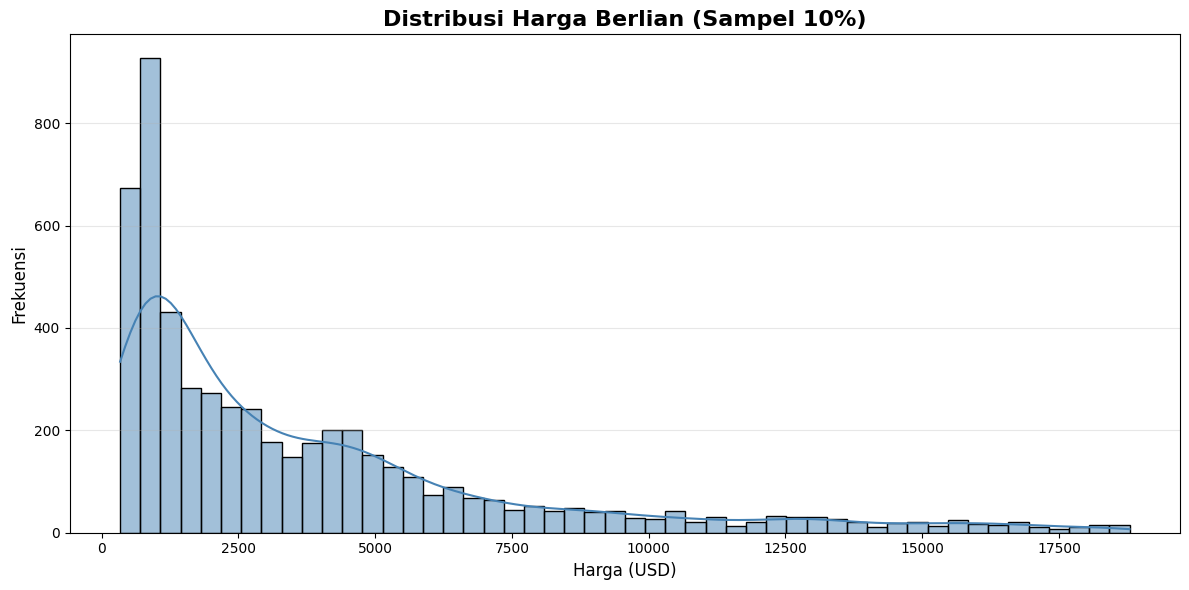


📊 CARA BACA HISTOGRAM:
   - Sumbu X: Harga berlian
   - Sumbu Y: Berapa banyak berlian di range harga tersebut
   - Kurva biru: Estimasi distribusi (KDE)

💡 ANALISIS VISUAL:
   - Grafik miring ke KANAN (positive skew)
   - Artinya: Banyak berlian murah, sedikit yang mahal
   - Ekor panjang di kanan = ada beberapa berlian SANGAT mahal

KONFIRMASI SKEWNESS (KEMIRINGAN) DENGAN ANGKA

📐 Nilai Skewness:
+------------------+------------------+
|    Skewness Price|    Skewness Carat|
+------------------+------------------+
|1.6183502776052823|1.1166148681277634|
+------------------+------------------+


💡 INTERPRETASI SKEWNESS:
   - Skewness > 0 → Data miring ke KANAN (positive skew)
   - Skewness < 0 → Data miring ke KIRI (negative skew)
   - Skewness ≈ 0 → Data simetris (distribusi normal)

   👉 Nilai Skewness yang besar (>1) artinya Mean > Median
      Karena nilai ekstrem di kanan 'menarik' rata-rata ke atas!

VISUALISASI 2: BOX PLOT (Harga vs Kualitas Cut)


/tmp/ipython-input-725980435.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


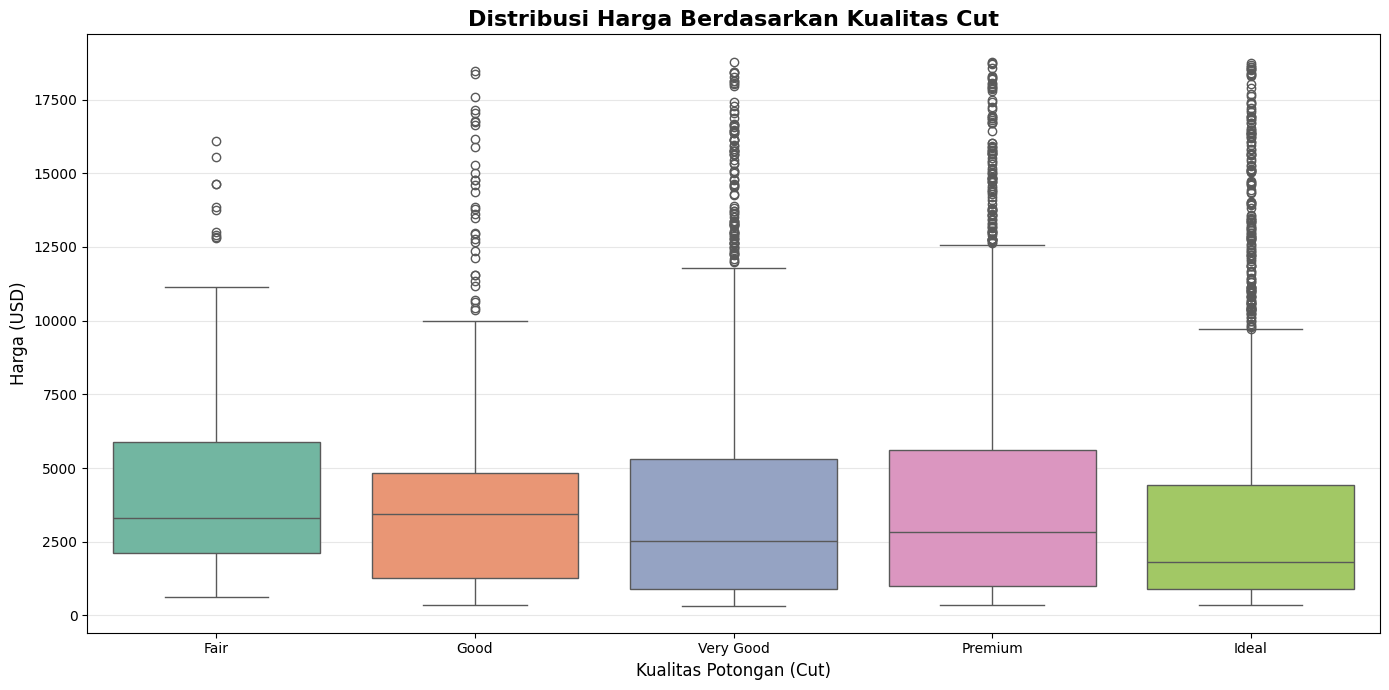


📦 CARA BACA BOX PLOT:
   ┌─────────────────────────────────────┐
   │         o  o  ← Outliers (data aneh)│
   │         |                           │
   │      ┌──┴──┐                        │
   │      │  ━  │ ← Kotak (Q1 ke Q3)     │
   │      │  │  │   Garis tengah = Median│
   │      └──┬──┘                        │
   │         |                           │
   │         o  ← Outliers               │
   └─────────────────────────────────────┘

💡 INSIGHT MENARIK:
   - 'Ideal' = cut terbaik, tapi median harganya TIDAK paling tinggi!
   - 'Premium' punya median harga lebih tinggi dari 'Ideal'
   - Banyak outliers (titik-titik) = berlian dengan harga ekstrem

VISUALISASI 3: BOX PLOT (Harga vs Warna)


/tmp/ipython-input-725980435.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


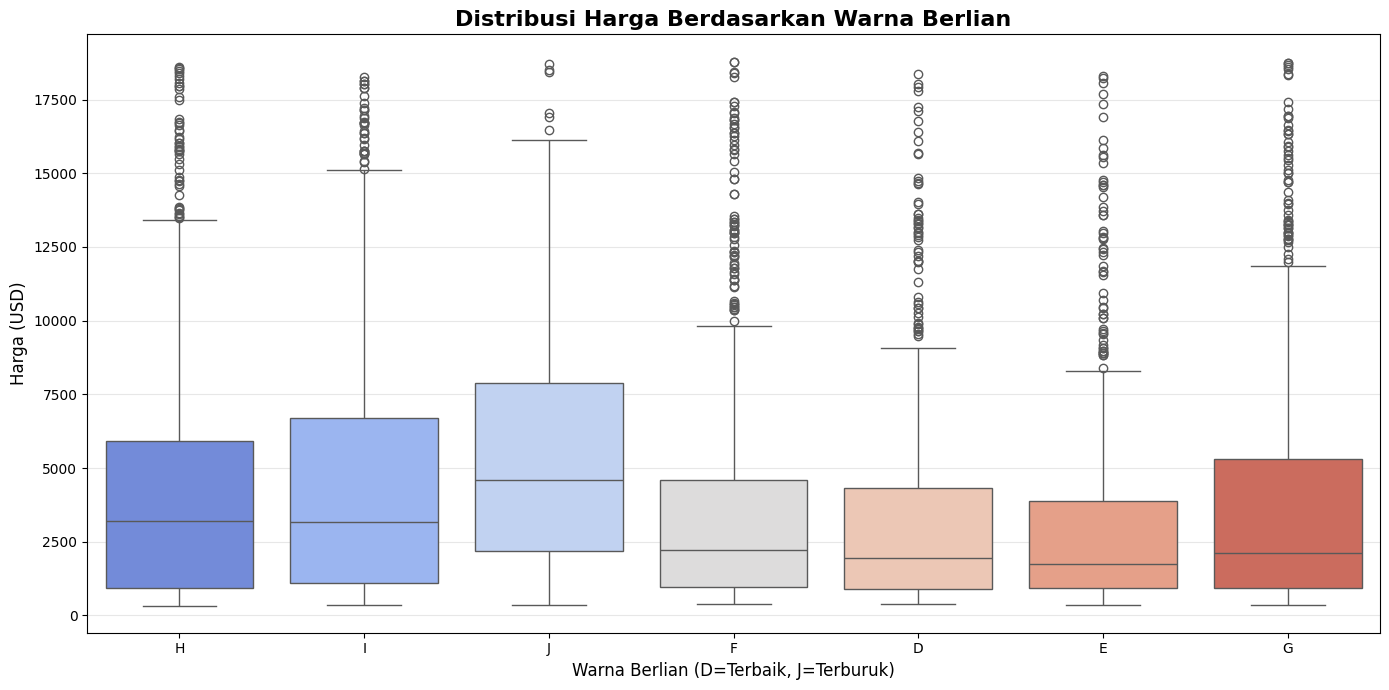

In [6]:
# ----------------------------------------------------------------------------
# 4. BAGIAN 2: ANALISIS DISTRIBUSI DATA
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("BAGIAN 2: ANALISIS DISTRIBUSI DATA (VISUALISASI)")
print("=" * 70)

# 4.1 Sampling Data
print("\n📦 Sampling Data (10% dari total)...")
print("   💡 MENGAPA PERLU SAMPLING?")
print("      - Tidak mungkin plot jutaan/miliaran baris langsung")
print("      - Ambil sampel representatif untuk visualisasi")

sampled_df = df.sample(withReplacement=False, fraction=0.1, seed=42)

# Konversi ke Pandas untuk visualisasi
viz_pandas_df = sampled_df.toPandas()

print(f"\n   ✅ Ukuran data asli: {df.count():,} baris")
print(f"   ✅ Ukuran data sampel: {len(viz_pandas_df):,} baris (10%)")

# 4.2 Visualisasi Histogram (Distribusi Price)
print("\n" + "=" * 70)
print("VISUALISASI 1: HISTOGRAM (Distribusi Harga)")
print("=" * 70)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(viz_pandas_df['price'], kde=True, bins=50, color='steelblue')
plt.title('Distribusi Harga Berlian (Sampel 10%)', fontsize=16, fontweight='bold')
plt.xlabel('Harga (USD)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 CARA BACA HISTOGRAM:")
print("   - Sumbu X: Harga berlian")
print("   - Sumbu Y: Berapa banyak berlian di range harga tersebut")
print("   - Kurva biru: Estimasi distribusi (KDE)")
print("\n💡 ANALISIS VISUAL:")
print("   - Grafik miring ke KANAN (positive skew)")
print("   - Artinya: Banyak berlian murah, sedikit yang mahal")
print("   - Ekor panjang di kanan = ada beberapa berlian SANGAT mahal")

# 4.3 Konfirmasi Skewness dengan Angka
print("\n" + "=" * 70)
print("KONFIRMASI SKEWNESS (KEMIRINGAN) DENGAN ANGKA")
print("=" * 70)

from pyspark.sql.functions import skewness

skewness_result = df.select(
    skewness("price").alias("Skewness Price"),
    skewness("carat").alias("Skewness Carat")
)

print("\n📐 Nilai Skewness:")
skewness_result.show()

print("\n💡 INTERPRETASI SKEWNESS:")
print("   - Skewness > 0 → Data miring ke KANAN (positive skew)")
print("   - Skewness < 0 → Data miring ke KIRI (negative skew)")
print("   - Skewness ≈ 0 → Data simetris (distribusi normal)")
print("\n   👉 Nilai Skewness yang besar (>1) artinya Mean > Median")
print("      Karena nilai ekstrem di kanan 'menarik' rata-rata ke atas!")

# 4.4 Visualisasi Box Plot (Harga berdasarkan Kualitas Cut)
print("\n" + "=" * 70)
print("VISUALISASI 2: BOX PLOT (Harga vs Kualitas Cut)")
print("=" * 70)

plt.figure(figsize=(14, 7))
sns.boxplot(
    data=viz_pandas_df,
    x='cut',
    y='price',
    order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    palette='Set2'
)
plt.title('Distribusi Harga Berdasarkan Kualitas Cut', fontsize=16, fontweight='bold')
plt.xlabel('Kualitas Potongan (Cut)', fontsize=12)
plt.ylabel('Harga (USD)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📦 CARA BACA BOX PLOT:")
print("   ┌─────────────────────────────────────┐")
print("   │         o  o  ← Outliers (data aneh)│")
print("   │         |                           │")
print("   │      ┌──┴──┐                        │")
print("   │      │  ━  │ ← Kotak (Q1 ke Q3)     │")
print("   │      │  │  │   Garis tengah = Median│")
print("   │      └──┬──┘                        │")
print("   │         |                           │")
print("   │         o  ← Outliers               │")
print("   └─────────────────────────────────────┘")
print("\n💡 INSIGHT MENARIK:")
print("   - 'Ideal' = cut terbaik, tapi median harganya TIDAK paling tinggi!")
print("   - 'Premium' punya median harga lebih tinggi dari 'Ideal'")
print("   - Banyak outliers (titik-titik) = berlian dengan harga ekstrem")

# Box Plot untuk Harga berdasarkan Warna
print("\n" + "=" * 70)
print("VISUALISASI 3: BOX PLOT (Harga vs Warna)")
print("=" * 70)

plt.figure(figsize=(14, 7))
sns.boxplot(
    data=viz_pandas_df,
    x='color',
    y='price',
    palette='coolwarm'
)
plt.title('Distribusi Harga Berdasarkan Warna Berlian', fontsize=16, fontweight='bold')
plt.xlabel('Warna Berlian (D=Terbaik, J=Terburuk)', fontsize=12)
plt.ylabel('Harga (USD)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
# ----------------------------------------------------------------------------
# 5. LATIHAN (BAGIAN 6 DARI MODUL)
# ----------------------------------------------------------------------------
print("\n" + "=" * 70)
print("BAGIAN 5: LATIHAN")
print("=" * 70)

# LATIHAN 1: Statistik Deskriptif untuk kolom 'carat'
print("\n📝 LATIHAN 1: Statistik Deskriptif untuk 'carat'")
print("-" * 70)

# Hitung Mean, Median, StdDev
carat_mean = df.select(mean("carat")).collect()[0][0]
carat_median_approx = df.approxQuantile("carat", [0.5], 0.01)[0]
carat_stddev = df.select(stddev("carat")).collect()[0][0]

carat_stats = df.select(
    mean("carat").alias("Mean Carat"),
    stddev("carat").alias("StdDev Carat"),
    min("carat").alias("Min Carat"),
    max("carat").alias("Max Carat")
)

print("\n📊 Statistik Kolom 'carat':")
carat_stats.show()
print(f"📍 Median 'carat' (aproksimasi): {carat_median_approx:.3f}")

print("\n💡 INTERPRETASI:")
print(f"   - Rata-rata berat berlian: {carat_mean:.3f} karat")
print(f"   - Median berat berlian: {carat_median_approx:.3f} karat")
print(f"   - Simpangan baku: {carat_stddev:.3f} (variasi berat cukup besar)")


BAGIAN 5: LATIHAN

📝 LATIHAN 1: Statistik Deskriptif untuk 'carat'
----------------------------------------------------------------------

📊 Statistik Kolom 'carat':
+------------------+------------------+---------+---------+
|        Mean Carat|      StdDev Carat|Min Carat|Max Carat|
+------------------+------------------+---------+---------+
|0.7979397478679908|0.4740112444054214|      0.2|     5.01|
+------------------+------------------+---------+---------+

📍 Median 'carat' (aproksimasi): 0.700

💡 INTERPRETASI:
   - Rata-rata berat berlian: 0.798 karat
   - Median berat berlian: 0.700 karat
   - Simpangan baku: 0.474 (variasi berat cukup besar)


In [17]:
# LATIHAN BAGIAN 2: Bandingkan rata-rata price untuk color D vs J
print("\n📝 LATIHAN BAGIAN 2: Perbandingan Harga (Color D vs J)")
print("-" * 70)

# Filter untuk color D dan J
price_D = df.filter(col("color") == "D").select(mean("price")).collect()[0][0]
price_J = df.filter(col("color") == "J").select(mean("price")).collect()[0][0]

print(f"\n💎 Rata-rata harga berlian warna D (terbaik): ${price_D:,.2f}")
print(f"💎 Rata-rata harga berlian warna J (terburuk): ${price_J:,.2f}")
print(f"\n📊 Selisih harga: ${__builtins__.abs(price_D - price_J):,.2f}")

if price_D > price_J:
    print(f"\n✅ KESIMPULAN: Berlian warna D rata-rata lebih mahal ${price_D - price_J:,.2f}")
else:
    print(f"\n✅ KESIMPULAN: Berlian warna J rata-rata lebih mahal ${price_J - price_D:,.2f}")

# Statistik lengkap per color
print("\n📊 Statistik Harga per Warna:")
color_stats = df.groupBy("color") \
    .agg(
        count("price").alias("Jumlah"),
        mean("price").alias("Rata-rata Harga"),
        min("price").alias("Harga Min"),
        max("price").alias("Harga Max")
    ) \
    .orderBy("color")

color_stats.show()


📝 LATIHAN BAGIAN 2: Perbandingan Harga (Color D vs J)
----------------------------------------------------------------------

💎 Rata-rata harga berlian warna D (terbaik): $3,169.95
💎 Rata-rata harga berlian warna J (terburuk): $5,323.82

📊 Selisih harga: $2,153.86

✅ KESIMPULAN: Berlian warna J rata-rata lebih mahal $2,153.86

📊 Statistik Harga per Warna:
+-----+------+------------------+---------+---------+
|color|Jumlah|   Rata-rata Harga|Harga Min|Harga Max|
+-----+------+------------------+---------+---------+
|    D|  6775|3169.9540959409596|      357|    18693|
|    E|  9797|3076.7524752475247|      326|    18731|
|    F|  9542| 3724.886396981765|      342|    18791|
|    G| 11292| 3999.135671271697|      354|    18818|
|    H|  8304| 4486.669195568401|      337|    18803|
|    I|  5422| 5091.874953891553|      334|    18823|
|    J|  2808|  5323.81801994302|      335|    18710|
+-----+------+------------------+---------+---------+




📝 LATIHAN 3: Histogram untuk 'depth'
----------------------------------------------------------------------


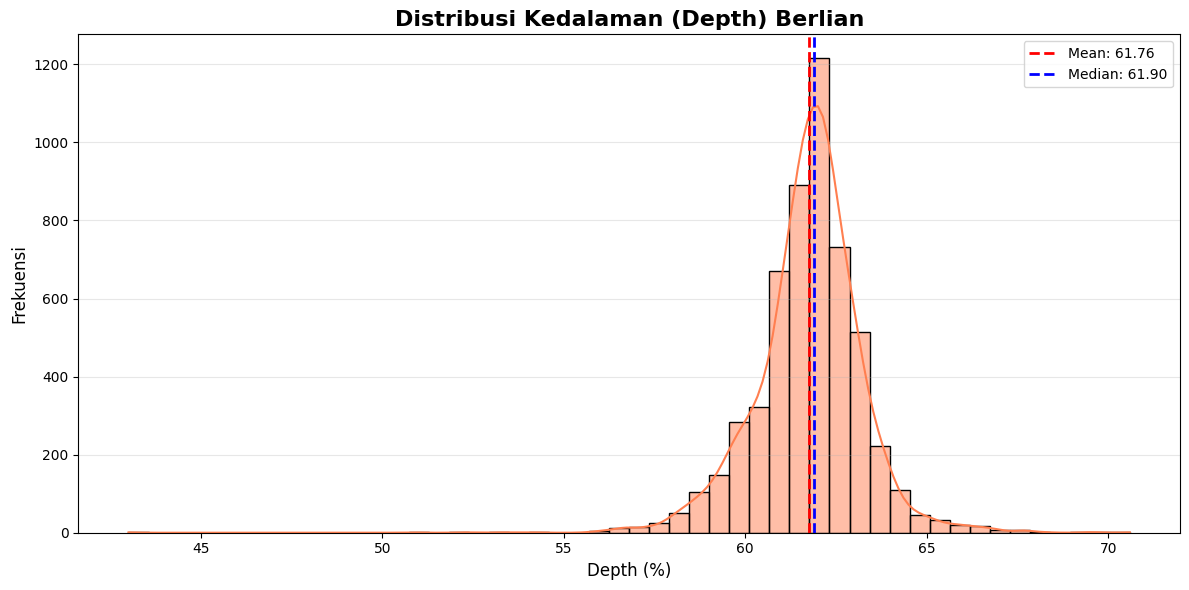


📐 Skewness 'depth': -0.0823

💡 ANALISIS DISTRIBUSI 'DEPTH':
   ✅ Distribusi terlihat NORMAL (simetris, bentuk lonceng)
      - Mean ≈ Median
      - Skewness mendekati 0

   ℹ️ Lihat grafik histogram di atas:
      - Jika ada 2 puncak → BIMODAL (2 kelompok data berbeda)
      - Jika 1 puncak → UNIMODAL (1 kelompok data)


In [15]:
# LATIHAN 3: Histogram untuk kolom 'depth'
print("\n📝 LATIHAN 3: Histogram untuk 'depth'")
print("-" * 70)

plt.figure(figsize=(12, 6))
sns.histplot(viz_pandas_df['depth'], kde=True, bins=50, color='coral')
plt.title('Distribusi Kedalaman (Depth) Berlian', fontsize=16, fontweight='bold')
plt.xlabel('Depth (%)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(viz_pandas_df['depth'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {viz_pandas_df['depth'].mean():.2f}")
plt.axvline(viz_pandas_df['depth'].median(), color='blue', linestyle='--', linewidth=2, label=f"Median: {viz_pandas_df['depth'].median():.2f}")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Hitung skewness untuk depth
depth_skewness = df.select(skewness("depth")).collect()[0][0]

print(f"\n📐 Skewness 'depth': {depth_skewness:.4f}")
print("\n💡 ANALISIS DISTRIBUSI 'DEPTH':")

if __builtins__.abs(depth_skewness) < 0.5:
    print("   ✅ Distribusi terlihat NORMAL (simetris, bentuk lonceng)")
    print("      - Mean ≈ Median")
    print("      - Skewness mendekati 0")
elif depth_skewness > 0.5:
    print("   ✅ Distribusi SKEWED (miring ke kanan)")
    print("      - Mean > Median")
    print("      - Ekor panjang di kanan")
elif depth_skewness < -0.5:
    print("   ✅ Distribusi SKEWED (miring ke kiri)")
    print("      - Mean < Median")
    print("      - Ekor panjang di kiri")

# Cek apakah bimodal (2 puncak)
print("\n   ℹ️ Lihat grafik histogram di atas:")
print("      - Jika ada 2 puncak → BIMODAL (2 kelompok data berbeda)")
print("      - Jika 1 puncak → UNIMODAL (1 kelompok data)")